## Types of audio data representations

###  1. Waveform 
- time domain representation of sound.

In [1]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

print(f'array: {array}')
print(f'array_shape: {array.shape}')
print(f'sampling_rate: {sampling_rate}')

array: [-1.4068222e-03 -4.4607258e-04 -4.1098078e-04 ...  7.9623051e-06
 -3.0417003e-05  1.2765067e-05]
array_shape: (117601,)
sampling_rate: 22050


In [2]:
from pathlib import Path
import pandas as pd
from dataset import TestDataset

In [4]:
clip, _ = librosa.load('../00-07-52_dur=600secs.wav', sr=32000)

print(f'array: {clip}')
print(f'array_shape: {clip.shape}')

duration = librosa.get_duration(y=clip, sr=32000)
print(f'duration: {duration}')

seconds = list(range(5, int(duration), 5))  # Ensure it covers the whole audio length
print(f'seconds: {seconds}')

filename = Path('../00-07-52_dur=600secs.wav').stem
print(f'filename: {filename}')

row_ids = [filename + f"_{second}" for second in seconds] # Generate row ids for each segment
print(f'row_ids: {row_ids}')

test_df = pd.DataFrame({
        "row_id": row_ids,
        "seconds": seconds,
    })
print('*' * 200)
print(f'test_df: {test_df.head()}')

array: [-4.8978515e-03 -7.2130230e-03 -9.6160118e-05 ...  3.8444130e-03
  5.0813844e-03  2.5231761e-03]
array_shape: (19200000,)
duration: 600.0
seconds: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595]
filename: 00-07-52_dur=600secs
row_ids: ['00-07-52_dur=600secs_5', '00-07-52_dur=600secs_10', '00-07-52_dur=600secs_15', '00-07-52_dur=600secs_20', '00-07-52_dur=600secs_25', '00-07-52_dur=600secs_30', '00-07-52_dur=600secs_35', '00-07-52_dur=600secs_40', '00-07-52_dur=

###  2. Frequency spectrum 
- frequency domain representation
- The spectrum is computed using the discrete Fourier transform or DFT.

In [6]:
import matplotlib.pyplot as plt

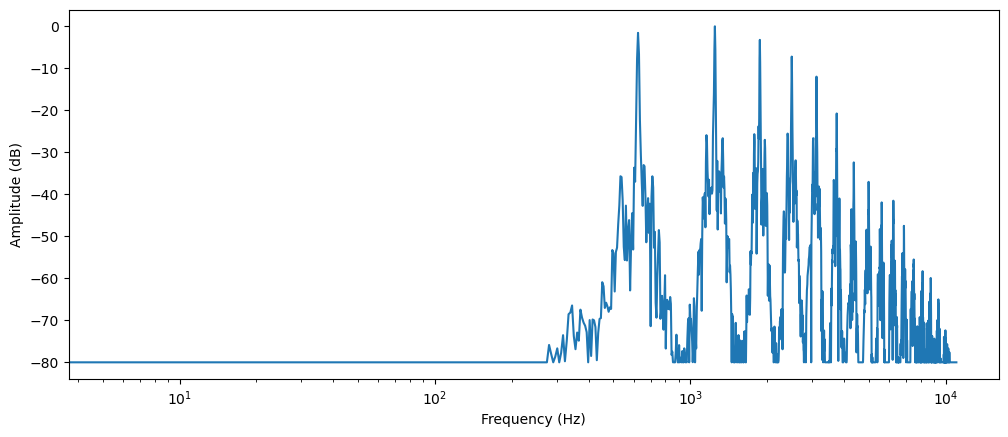

In [7]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

### 3. Spectrogram

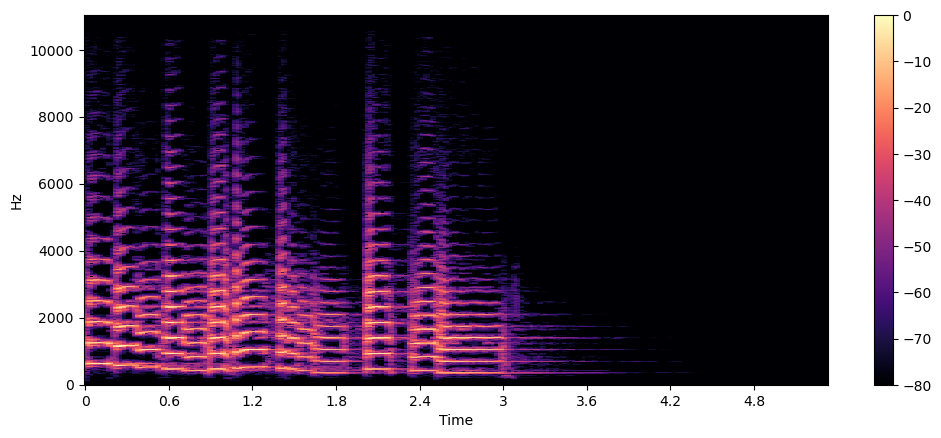

In [8]:
import numpy as np
import matplotlib.pyplot as plt

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

### 4. Mel-spectrogram

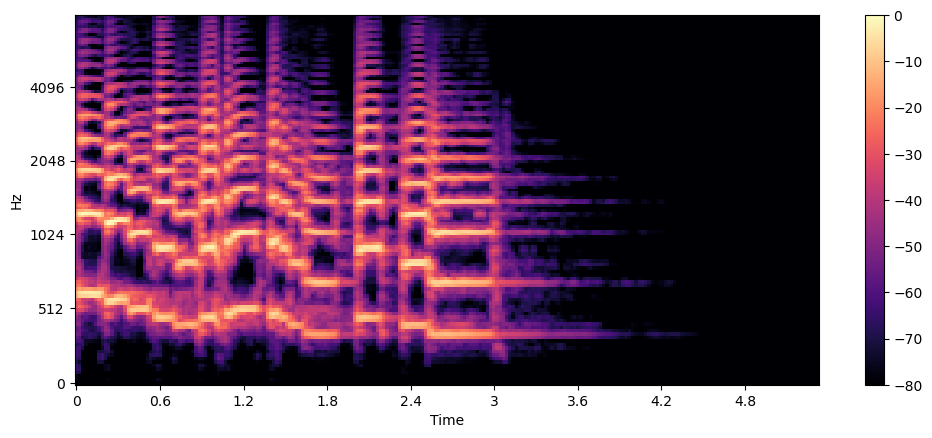

In [9]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

## Notes

By nature, a sound wave is a continuous signal, meaning it contains an infinite number of signal values in a given time.
(.wav/ .mp3/ .flac) These formats mainly differ in how they compress the digital representation of the audio signal.

The analog signal is first captured by a microphone, which converts the sound waves into an electrical signal. The electrical signal is then digitized by an Analog-to-Digital Converter to get the digital representation through sampling.

The sampling rate (also called sampling frequency) is the number of samples taken in one second and is measured in hertz (Hz). To give you a point of reference, CD-quality audio has a sampling rate of 44,100 Hz, meaning samples are taken 44,100 times per second. For comparison, high-resolution audio has a sampling rate of 192,000 Hz or 192 kHz. A common sampling rate used in training speech models is 16,000 Hz or 16 kHz.

It’s important to ensure that all audio examples in your dataset have the same sampling rate when working on any audio task. If you plan to use custom audio data to fine-tune a pre-trained model, the sampling rate of your data should match the sampling rate of the data the model was pre-trained on. The sampling rate determines the time interval between successive audio samples, which impacts the temporal resolution of the audio data. Consider an example: a 5-second sound at a sampling rate of 16,000 Hz will be represented as a series of 80,000 values, while the same 5-second sound at a sampling rate of 8,000 Hz will be represented as a series of 40,000 values

Just as with continuous audio signals, the amplitude of digital audio is typically expressed in decibels (dB). Since human hearing is logarithmic in nature — our ears are more sensitive to small fluctuations in quiet sounds than in loud sounds — the loudness of a sound is easier to interpret if the amplitudes are in decibels, which are also logarithmic. The decibel scale for real-world audio starts at 0 dB, which represents the quietest possible sound humans can hear, and louder sounds have larger values. However, for digital audio signals, 0 dB is the loudest possible amplitude, while all other amplitudes are negative. As a quick rule of thumb: every -6 dB is a halving of the amplitude, and anything below -60 dB is generally inaudible unless you really crank up the volume.